In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectFromModel

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_final = pd.read_csv('merged_raw.csv', index_col = [0])
df_final = df_final.drop(columns = ['SEQN', 'Is_Diabetic', 'final_IsDia', 'Unnamed: 0.1'])
#df_final = df_final.drop(columns = ['SEQN', 'Unnamed: 0.1'])
df_final.dropna(inplace=True)
df_numeric = pd.get_dummies(df_final)
df_numeric

,Cadmium (ug/L),Lead (ug/dL),Blood manganese (ug/L),"Mercury, total (ug/L)",Blood selenium(ug/L),LDL-Cholesterol,Lymphocyte number,Monocyte number,Segmented neutrophils number,Eosinophils number,...,FamilyIncome_20-25k,FamilyIncome_25-35k,FamilyIncome_35-45k,FamilyIncome_45-55k,FamilyIncome_5-10k,FamilyIncome_55-65k,FamilyIncome_65-75k,FamilyIncome_75-99k,FamilyIncome_<5k,FamilyIncome_>100k
0,0.22,1.45,9.57,1.27,209.64,126.00,1.0,0.80,4.90,0.40,...,0,0,0,0,0,0,1,0,0,0
1,0.37,1.00,16.80,0.42,195.62,168.00,1.6,0.30,3.00,0.30,...,0,0,0,0,0,0,1,0,0,0
3,0.50,1.35,8.31,0.33,219.00,161.00,2.3,0.60,3.80,0.10,...,0,0,0,0,0,0,0,0,0,0
4,0.36,1.38,8.14,0.87,212.84,161.00,0.8,0.40,2.80,0.10,...,0,0,0,0,0,0,0,1,0,0
5,0.07,0.59,9.62,0.20,168.49,195.00,2.1,0.50,5.00,0.10,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,0.79,1.62,11.19,2.41,205.41,222.35,2.2,0.54,3.93,0.23,...,0,1,0,0,0,0,0,0,0,0
9888,0.79,1.62,11.19,2.41,205.41,222.35,2.2,0.54,3.93,0.23,...,0,0,0,0,0,0,0,0,0,1
9889,0.79,1.62,11.19,2.41,205.41,222.35,2.2,0.54,3.93,0.23,...,0,0,0,1,0,0,0,0,0,0
9890,0.79,1.62,11.19,2.41,205.41,222.35,2.2,0.54,3.93,0.23,...,0,0,0,0,0,1,0,0,0,0


In [3]:
df_numeric = df_numeric.drop(columns = ['is_diabetic'])
df_numeric

,Cadmium (ug/L),Lead (ug/dL),Blood manganese (ug/L),"Mercury, total (ug/L)",Blood selenium(ug/L),LDL-Cholesterol,Lymphocyte number,Monocyte number,Segmented neutrophils number,Eosinophils number,...,FamilyIncome_20-25k,FamilyIncome_25-35k,FamilyIncome_35-45k,FamilyIncome_45-55k,FamilyIncome_5-10k,FamilyIncome_55-65k,FamilyIncome_65-75k,FamilyIncome_75-99k,FamilyIncome_<5k,FamilyIncome_>100k
0,0.22,1.45,9.57,1.27,209.64,126.00,1.0,0.80,4.90,0.40,...,0,0,0,0,0,0,1,0,0,0
1,0.37,1.00,16.80,0.42,195.62,168.00,1.6,0.30,3.00,0.30,...,0,0,0,0,0,0,1,0,0,0
3,0.50,1.35,8.31,0.33,219.00,161.00,2.3,0.60,3.80,0.10,...,0,0,0,0,0,0,0,0,0,0
4,0.36,1.38,8.14,0.87,212.84,161.00,0.8,0.40,2.80,0.10,...,0,0,0,0,0,0,0,1,0,0
5,0.07,0.59,9.62,0.20,168.49,195.00,2.1,0.50,5.00,0.10,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,0.79,1.62,11.19,2.41,205.41,222.35,2.2,0.54,3.93,0.23,...,0,1,0,0,0,0,0,0,0,0
9888,0.79,1.62,11.19,2.41,205.41,222.35,2.2,0.54,3.93,0.23,...,0,0,0,0,0,0,0,0,0,1
9889,0.79,1.62,11.19,2.41,205.41,222.35,2.2,0.54,3.93,0.23,...,0,0,0,1,0,0,0,0,0,0
9890,0.79,1.62,11.19,2.41,205.41,222.35,2.2,0.54,3.93,0.23,...,0,0,0,0,0,1,0,0,0,0


In [4]:
# Do PCA

# Scale the data
scaler = StandardScaler()
df_numeric_scaled = scaler.fit_transform(df_numeric)

# Apply PCA
pca = PCA(n_components = 0.8)
x_pca = pca.fit_transform(df_numeric_scaled)

In [5]:
pca_df = pd.DataFrame(x_pca)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,5.912300,-0.806008,-2.345023,2.735725,2.430807,-0.505676,-0.261281,-1.910397,-1.009280,0.294043,...,-0.320640,0.013944,0.140782,-0.367253,-1.114841,-1.453717,-1.242716,-2.475412,-0.356673,-0.665920
1,4.797082,1.809335,-1.105835,-2.978558,-2.193563,0.072177,2.072473,-3.329200,-0.353272,-0.363161,...,-1.316039,0.271121,0.571590,-1.612187,-1.247922,0.836152,1.439557,-1.897476,0.682884,0.388228
2,6.952338,0.150075,-2.445242,0.049832,0.585570,2.966554,-0.138356,-3.323301,0.228164,0.203572,...,0.186783,0.153076,-0.724924,-0.267652,-0.341736,0.499313,-0.670753,0.184508,-0.461764,-0.849702
3,5.196642,2.098475,-1.218091,1.598974,-1.409544,-1.787381,0.118003,-5.461099,1.627767,-0.461844,...,-0.020882,-0.098919,0.707237,0.070847,-0.413483,-1.187186,-0.139969,-0.149401,0.435794,-0.527682
4,4.283007,2.650018,-1.080762,-1.146282,-3.178548,-0.228521,1.093930,-2.104431,-1.857909,-0.623547,...,-0.147968,-0.682381,0.021090,-0.275604,-0.122890,-1.184821,0.366243,0.222404,0.838505,-0.317424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8966,-2.309922,0.073018,7.295381,-1.551668,1.849252,2.411139,-0.434716,0.251036,1.528433,0.480158,...,-2.211201,0.946080,-0.263145,2.125319,-0.863751,0.516357,-0.856515,0.164865,2.206272,0.093366
8967,-0.329052,-2.543270,3.556686,2.576302,1.403135,-5.250021,-5.264634,-0.680514,-2.307910,-0.770436,...,-0.788821,-1.152269,0.010022,-0.978510,1.787308,-0.708112,-0.315466,-1.726750,-0.764323,-0.677754
8968,0.025528,-2.865598,-1.232841,0.856079,1.727627,-0.628227,0.142913,-1.662692,2.032804,0.519199,...,0.973326,0.558493,-0.023082,-0.778025,-0.006366,-0.484205,-0.514366,1.151297,0.379629,-0.745973
8969,-1.112429,-2.476609,6.281277,2.627596,2.657804,2.508245,-1.309943,0.014184,0.645018,0.091236,...,-1.381710,1.165717,1.010046,0.329741,-0.482062,-0.054483,1.403735,0.163152,-0.452982,1.313472


In [6]:
# create X and y

X_unscaled = pca_df
y = df_final['is_diabetic']

#scale X for faster convergance

scaler = StandardScaler()

X = scaler.fit_transform(X_unscaled)


#train and test split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.3, random_state = 42, stratify = y)


# C values for lasso penalty

C_values = [0.001, 0.01, 0.1,0.3, 0.5, 1]

tree_depth = list(range(2, 50))

# Linear SVC

In [7]:
# Build Model

accuracies = []

for C in C_values:
    lsvc = LinearSVC(C=C, penalty="l1", dual = False).fit(X_train, y_train)
    y_preds = lsvc.predict(X_test)
    accuracies.append(accuracy_score(y_test,y_preds))

c_ideal = C_values[np.argmax(accuracies)]
print ('C: ',c_ideal)

lsvc = LinearSVC(C=0.01, penalty="l1", dual = False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train_new = model.transform(X_train)
y_preds = lsvc.predict(X_test)

print ('shape original: ', X_train.shape)
print ('shape transformed: ', X_train_new.shape)

print('Linear SVC Test Accuracy Score: ', accuracy_score(y_test,y_preds))



scores = model_selection.cross_val_score(lsvc, X, y, cv=10)
print(scores)
print('Linear SVC average score: {}'.format(scores.mean()))

C:  0.3
shape original:  (6279, 89)
shape transformed:  (6279, 61)
Linear SVC Test Accuracy Score:  0.7826894502228826
[0.79510022 0.78372352 0.73913043 0.75919732 0.76365663 0.76923077
 0.8238573  0.78149387 0.79487179 0.77480491]
Linear SVC average score: 0.7785066777901095


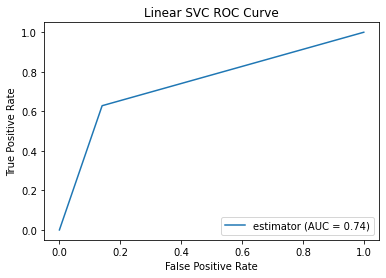

In [8]:
#ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='estimator')
display.plot()
plt.title("Linear SVC ROC Curve")
plt.show()

In [9]:
#Features used
importance_lsvc = lsvc.coef_[0]
cols_new = X_unscaled.columns.tolist()
importance_index_lsvc = np.nonzero(importance_lsvc)[0]

for i in importance_index_lsvc:
    print(cols_new[i], ': ', importance_lsvc[i])

0 :  0.27247532737768154
1 :  -0.2633443618460628
2 :  0.007616567317364684
3 :  -0.2932118808424099
4 :  0.14915346525938622
5 :  0.0024634028131470063
6 :  -0.003787265877461768
7 :  -0.2798552671359145
8 :  0.04329998345122257
10 :  0.01384725233170207
11 :  0.08315599548780729
12 :  -0.07597481639341146
13 :  -0.0547203460515297
14 :  -0.028240522692777523
15 :  0.05396166946755884
18 :  -0.0571544147057923
19 :  -0.06443537274034383
20 :  0.05554813336648689
21 :  -0.027551622605661925
22 :  -0.017067895800234354
23 :  0.026440144092410092
24 :  -0.0030498250876726824
28 :  0.005727810792507265
31 :  -0.026293393463601076
32 :  0.0038990946902836285
35 :  0.004039158293795622
37 :  -0.008714851142161282
38 :  0.01349547855412221
40 :  -0.01091074751421618
41 :  0.012725501260823495
43 :  -0.01719810600139846
44 :  -0.00014101875085311379
45 :  0.0033935872069974847
46 :  0.003228143113390829
49 :  2.1115952520845206e-05
51 :  0.026480901560859523
52 :  -0.0009653806929464706
53 : 

In [10]:
#Rank Features
for importance, name in sorted(zip(lsvc.coef_[0], X_unscaled.columns),reverse=True)[:20]:
    print (name, importance)

0 0.27247532737768154
4 0.14915346525938622
11 0.08315599548780729
20 0.05554813336648689
15 0.05396166946755884
8 0.04329998345122257
71 0.02670573166435611
55 0.026488627047344223
51 0.026480901560859523
23 0.026440144092410092
10 0.01384725233170207
38 0.01349547855412221
69 0.013145338242115214
41 0.012725501260823495
61 0.010841669130589761
64 0.009478537595520947
62 0.009102321249901867
2 0.007616567317364684
73 0.006768246775036042
28 0.005727810792507265


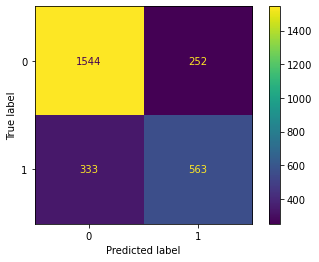

In [11]:
#Confusion Matrix display
cm_lsvc = confusion_matrix(y_test, y_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_lsvc,
                              display_labels=lsvc.classes_)
disp.plot()

plt.show()

# Logistic Regression

In [12]:
#Build Model


accuracies = []

for C in C_values:
    lr = LogisticRegression(C=C, penalty="l1", dual = False, solver='liblinear').fit(X_train, y_train)
    y_preds = lr.predict(X_test)
    accuracies.append(accuracy_score(y_test,y_preds))

c_ideal = C_values[np.argmax(accuracies)]
print ('C: ',c_ideal)

lr = LogisticRegression(C=c_ideal, penalty="l1", dual = False, solver='liblinear').fit(X_train, y_train)
model = SelectFromModel(lr, prefit=True)
X_train_new = model.transform(X_train)
X_test_new = model.transform(X_test)
y_preds = lr.predict(X_test)

print ('shape original: ', X_train.shape)
print ('shape transformed: ', X_train_new.shape)
print('Logistic Regression Test Accuracy: ',accuracy_score(y_test,y_preds))


scores = model_selection.cross_val_score(lr, X, y, cv=10)
print(scores)
print('Logistic Regression average score: {}'.format(scores.mean()))

C:  0.1
shape original:  (6279, 89)
shape transformed:  (6279, 73)
Logistic Regression Test Accuracy:  0.787147102526003
[0.78953229 0.787068   0.73467113 0.75362319 0.76142698 0.75585284
 0.80936455 0.787068   0.79598662 0.77146042]
Logistic Regression average score: 0.7746054033117072


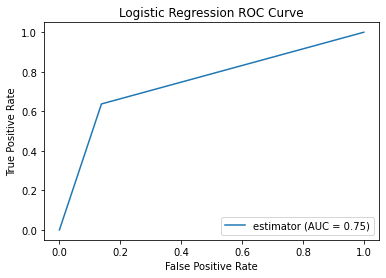

In [13]:
#ROC Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='estimator')
display.plot()
plt.title("Logistic Regression ROC Curve")

plt.show()

In [14]:
#Features Used

importance_lr = lr.coef_[0]
cols_new = X_unscaled.columns.tolist()
importance_index_lr = np.nonzero(importance_lr)[0]

for i in importance_index_lr:
    print(cols_new[i], ': ', importance_lr[i])

0 :  1.0587253645838581
1 :  -1.0175376908662581
2 :  0.13971362989666064
3 :  -0.9154313996326909
4 :  0.3534812255436671
5 :  -0.040134217903252424
6 :  -0.07118419944851123
7 :  -0.7990081372813844
8 :  0.20197263329018544
10 :  0.011301387184223934
11 :  0.25439615367347346
12 :  -0.18304680498375375
13 :  -0.18132780968854847
14 :  -0.10899391241614402
15 :  0.15022927109677023
16 :  0.04515884435924551
17 :  -0.08475980071994221
18 :  -0.185914388269092
19 :  -0.25540639651319846
20 :  0.235629487944832
21 :  -0.11158912381294406
22 :  -0.05708193810840902
23 :  0.10401726033997523
24 :  -0.05813007999615937
25 :  -0.036489070275899135
28 :  0.061225363972411184
30 :  0.01244113084427586
31 :  -0.09401956913874936
32 :  0.03324321807113199
33 :  0.019253958391919457
35 :  0.0885659447295935
37 :  -0.039384512008348194
38 :  0.099597771040815
39 :  0.004745063129041934
40 :  -0.07041141439939885
41 :  0.07121970419374984
43 :  -0.05140737996094691
44 :  -0.005638418369205732
45 : 

In [15]:
#Rank Features
for importance, name in sorted(zip(lr.coef_[0], X_unscaled.columns),reverse=True)[:20]:
    print (name, importance)

0 1.0587253645838581
4 0.3534812255436671
11 0.25439615367347346
20 0.235629487944832
8 0.20197263329018544
15 0.15022927109677023
2 0.13971362989666064
71 0.10813140335019135
55 0.10690094566623937
23 0.10401726033997523
51 0.1030249527380066
38 0.099597771040815
35 0.0885659447295935
64 0.08011676416017548
41 0.07121970419374984
69 0.06744375438084037
61 0.06284958182580026
28 0.061225363972411184
84 0.05312825643820714
16 0.04515884435924551


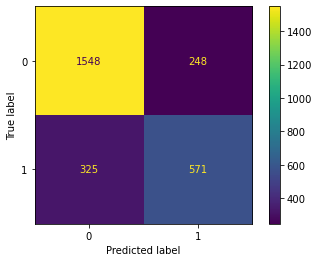

In [16]:
#Confusion Matrix

cm_lr = confusion_matrix(y_test, y_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr,
                              display_labels=lr.classes_)
disp.plot()

plt.show()

# Decision Tree

In [17]:
# Build Model
       
accuracies = []

for d in tree_depth:
    dtc = DecisionTreeClassifier(max_depth = d,random_state=42).fit(X_train,y_train)
    y_preds = dtc.predict(X_test)
    accuracies.append(accuracy_score(y_test,y_preds))

ideal_d = tree_depth[np.argmax(accuracies)]
print ('Ideal Tree Depth: ', ideal_d)
       
dtc = DecisionTreeClassifier(max_depth = ideal_d,random_state=42).fit(X_train,y_train)
model = SelectFromModel(dtc, prefit=True)
X_train_new = model.transform(X_train)
X_test_new = model.transform(X_test)


# predict
y_preds = dtc.predict(X_test)

print ('shape original: ', X_train.shape)
print ('shape transformed: ', X_train_new.shape)
print('Decision Tree Test Accuracy: ',accuracy_score(y_test,y_preds))


scores = model_selection.cross_val_score(dtc, X, y, cv=10)
print(scores)
print('Decision Tree average score: {}'.format(scores.mean()))

Ideal Tree Depth:  4
shape original:  (6279, 89)
shape transformed:  (6279, 7)
Decision Tree Test Accuracy:  0.7436849925705795
[0.75389755 0.72463768 0.70011148 0.74136009 0.72909699 0.74136009
 0.78483835 0.75027871 0.76031215 0.71571906]
Decision Tree average score: 0.7401612154347702


[Text(558.0, 733.86, '3 <= -0.814\ngini = 0.444\nsamples = 100.0%\nvalue = [0.667, 0.333]\nclass = ['),
 Text(279.0, 570.78, '7 <= 0.118\ngini = 0.478\nsamples = 23.9%\nvalue = [0.396, 0.604]\nclass = 1'),
 Text(139.5, 407.70000000000005, '0 <= 0.329\ngini = 0.428\nsamples = 15.8%\nvalue = [0.31, 0.69]\nclass = 1'),
 Text(69.75, 244.62, '1 <= 0.79\ngini = 0.47\nsamples = 9.8%\nvalue = [0.378, 0.622]\nclass = 1'),
 Text(34.875, 81.54000000000008, 'gini = 0.458\nsamples = 9.4%\nvalue = [0.356, 0.644]\nclass = 1'),
 Text(104.625, 81.54000000000008, 'gini = 0.083\nsamples = 0.4%\nvalue = [0.957, 0.043]\nclass = ['),
 Text(209.25, 244.62, '14 <= 0.588\ngini = 0.318\nsamples = 5.9%\nvalue = [0.198, 0.802]\nclass = 1'),
 Text(174.375, 81.54000000000008, 'gini = 0.248\nsamples = 4.9%\nvalue = [0.145, 0.855]\nclass = 1'),
 Text(244.125, 81.54000000000008, 'gini = 0.497\nsamples = 1.0%\nvalue = [0.46, 0.54]\nclass = 1'),
 Text(418.5, 407.70000000000005, '1 <= 0.558\ngini = 0.492\nsamples = 8.1%\

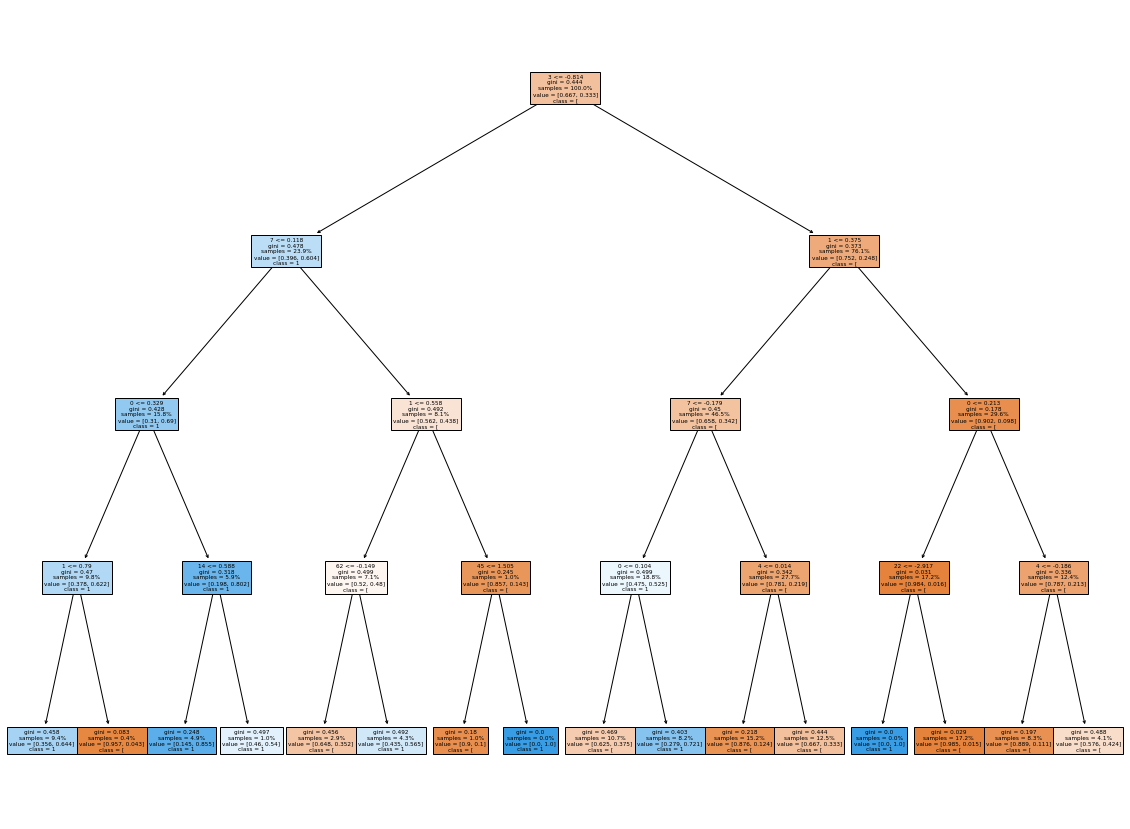

In [18]:
#Plot Tree

cn = list(str(df_final['is_diabetic'].unique()))
fn = list(X_unscaled.columns)

plt.figure(figsize = (20,15))

plot_tree(dtc, feature_names = fn, class_names = cn, filled = True, proportion=True)

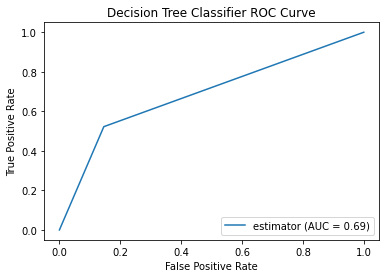

In [19]:
#ROC Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='estimator')
display.plot()

plt.title("Decision Tree Classifier ROC Curve")

plt.show()

In [20]:
#Rank Features

for importance, name in sorted(zip(dtc.feature_importances_, X_unscaled.columns),reverse=True)[:20]:
    print (name, importance)

3 0.3430551546761938
7 0.20613241215649467
1 0.193436263756299
0 0.1417430808238783
4 0.08402584178746024
14 0.012298518800459558
62 0.011542604634914624
45 0.005472991132098614
22 0.002293132232201184
88 0.0
87 0.0
86 0.0
85 0.0
84 0.0
83 0.0
82 0.0
81 0.0
80 0.0
79 0.0
78 0.0


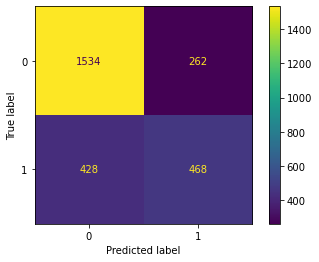

In [21]:
#Confusion Matrix

cm_dtc = confusion_matrix(y_test, y_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtc,
                              display_labels=dtc.classes_)
disp.plot()

plt.show()